<a href="https://colab.research.google.com/github/hellitonsm/iarepository/blob/main/midjourney4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers diffusers accelerate -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 KB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.5/191.5 KB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 92.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 26.9 MB/s eta 0:00:00


In [2]:
from diffusers import StableDiffusionPipeline
import torch

In [3]:
model_path = 'prompthero/midjourney-v4-diffusion'

In [4]:
pipe = StableDiffusionPipeline.from_pretrained(model_path , torch_dtype=torch.float16)

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.84k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/308 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/492M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/806 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/743 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/547 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

In [5]:
!nvidia-smi

Thu Jan  5 13:28:34 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
if torch.cuda.is_available():
  pipe = pipe.to("cuda")

device = "GPU 🔥" if torch.cuda.is_available() else "CPU 🥶"

In [8]:
device

'GPU 🔥'

In [10]:
base_prompt = "a beautiful anime cyborg girl with yellow eyes wearing a cat hoodie, pretty detailed eyes, full body. City background. postu"

In [11]:
prompt = "mdjrny-v4 style " + base_prompt

In [13]:
prompt = 'mdjrny-v4 style a beautiful anime cyborg girl with yellow eyes wearing a cat hoodie, pretty detailed eyes, full body. City background. posture by j scott campbell, perfect shading, soft studio lighting, ultra-realistic, photorealistic, octane render, cinematic lighting, hdr, in-frame, 4k, 8k, edge lighting'


In [14]:
prompt


'mdjrny-v4 style a beautiful anime cyborg girl with yellow eyes wearing a cat hoodie, pretty detailed eyes, full body. City background. posture by j scott campbell, perfect shading, soft studio lighting, ultra-realistic, photorealistic, octane render, cinematic lighting, hdr, in-frame, 4k, 8k, edge lighting'

In [15]:
result = pipe(
      prompt,  
      width = 512,
      height = 512)

  0%|          | 0/50 [00:00<?, ?it/s]

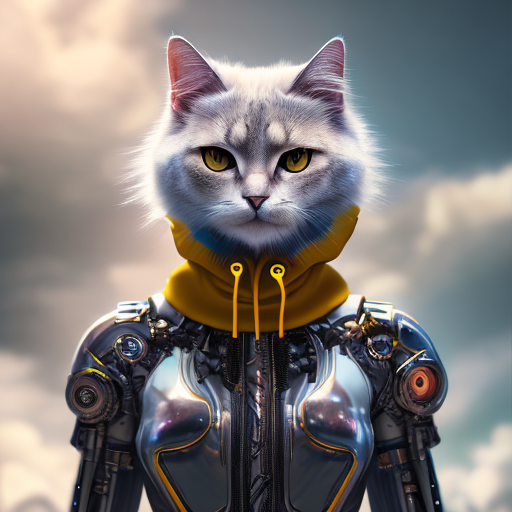

In [16]:
image = result.images[0]  
    
image.save("sd_img.png")

image


In [18]:
prompt = 'mdjrny-v4 style a beautiful anime cyborg girl with yellow eyes wearing a cat hoodie, pretty detailed eyes, full body. City background. posture by j scott campbell, perfect shading, soft studio lighting, ultra-realistic, photorealistic, octane render, cinematic lighting, hdr, in-frame, 4k, 8k, edge lighting'

In [19]:
result = pipe(
      prompt,  
      width = 512,
      height = 512)

  0%|          | 0/50 [00:00<?, ?it/s]

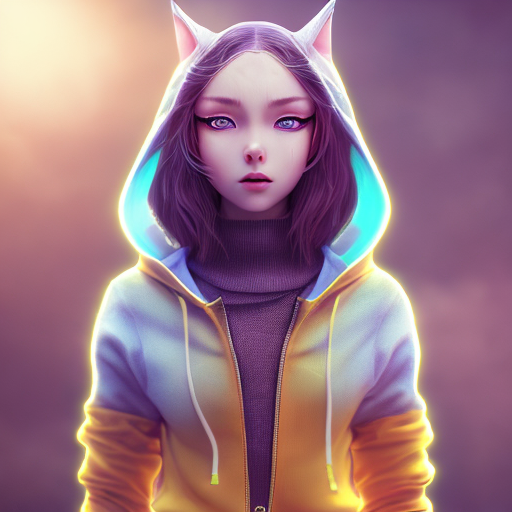

In [20]:
image = result.images[0]  
    
image.save("sd_img.png")

image

In [51]:
base_prompt = "A tesla car driving, new york style, dubai style, japonese signs, metropolis realistic road, photorealistic, octane render, cinematic lighting, hdr,"

In [62]:
prompt = ["mdjrny-v4 style " + base_prompt ] * 3

In [64]:
result = pipe(
      prompt,  
      width = 512,
      height = 512)

  0%|          | 0/50 [00:00<?, ?it/s]

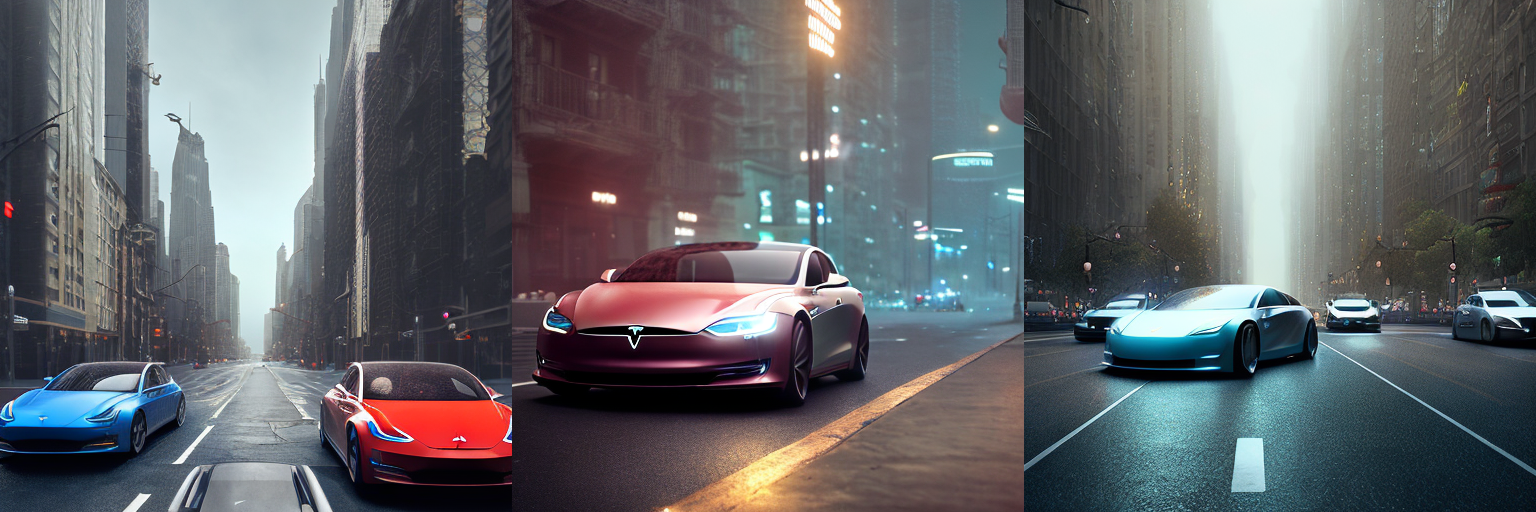

In [69]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

grid = image_grid(result.images, rows=1, cols=3)   
grid.save("sd_img.png")

grid